In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

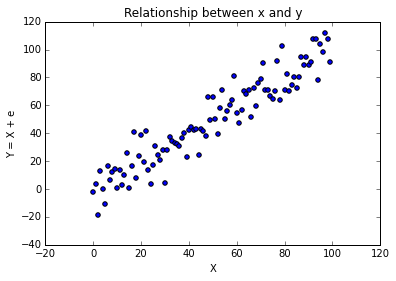

In [58]:
random_normal = np.random.randn(100)
x = np.arange(100)
e = np.random.randn(100)*10
y = x+e

plt.scatter(x,y)
plt.title('Relationship between x and y')
plt.xlabel('X')
plt.ylabel('Y = X + e')

# Sci-Kit Learn

There are 4 steps to any estimator, predictor in sklearn

* Import
* Create an object
* Fit the model
* Predict

coefficient [ 0.9965463]
intercept 0.506265624161


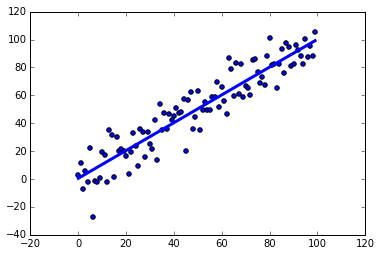

In [55]:
# Import
from sklearn import linear_model

# Create an object
rgr = linear_model.LinearRegression()

# Fit the model. Takes a multidimensional numpy array
rgr.fit(x.reshape(100, 1),y)

# Make prediction
pred = rgr.predict(x.reshape(100, 1))

print("coefficient {}".format(rgr.coef_))
print("intercept {}".format(rgr.intercept_))

plt.scatter(x,y)
plt.plot(x, rgr.predict(x.reshape(100, 1)), color='blue',linewidth=3)

# Estimate with Statsmodels

('Parameters: ', Intercept    0.905875
X            1.001005
dtype: float64)
('R2: ', 0.90064943784525431)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     888.4
Date:                Thu, 21 Jan 2016   Prob (F-statistic):           6.15e-51
Time:                        10:37:48   Log-Likelihood:                -368.04
No. Observations:                 100   AIC:                             740.1
Df Residuals:                      98   BIC:                             745.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------

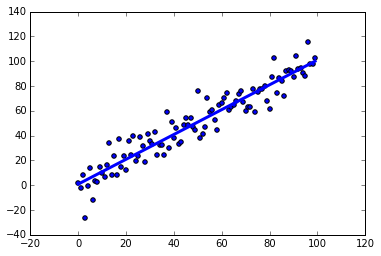

In [8]:
import statsmodels.formula.api as sm

df = pd.DataFrame({'X':x, 'Y':y})
model = sm.ols(formula='Y ~ X', data=df)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print(results.summary())
plt.scatter(x,y)
plt.plot(x, results.predict(pd.DataFrame(df['X'])), color='blue',linewidth=3)

# Estimate with SciPy

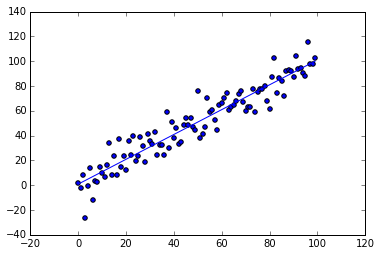

In [9]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, intercept + slope * x)

# Interactions & Polynomials

In [11]:
X = np.arange(6).reshape(3, 2)
print X

[[0 1]
 [2 3]
 [4 5]]


In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1,  0,  1,  0,  0,  1],
       [ 1,  2,  3,  4,  6,  9],
       [ 1,  4,  5, 16, 20, 25]])

In [15]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1,  0,  1,  0],
       [ 1,  2,  3,  6],
       [ 1,  4,  5, 20]])

In [16]:
poly = PolynomialFeatures()
poly.fit_transform(X)

array([[ 1,  0,  1,  0,  0,  1],
       [ 1,  2,  3,  4,  6,  9],
       [ 1,  4,  5, 16, 20, 25]])